This notebook analyzes data from https://github.com/HuthLab/deep-fMRI-dataset. To set up, see instructions in the `deep-fMRI-dataset` folder.

In [1]:
%load_ext autoreload
%autoreload 2
import datasets
import numpy as np
from os.path import join
from ridge_utils.SemanticModel import SemanticModel
from matplotlib import pyplot as plt
from typing import List
from sklearn.linear_model import RidgeCV, LogisticRegressionCV
from sklearn.feature_extraction.text import CountVectorizer
from feature_spaces import em_data_dir, data_dir, results_dir
from collections import defaultdict
import pandas as pd
import os
# from fit_linear_models import get_dsets
from ridge_utils.SemanticModel import SemanticModel

# Load fMRI prediction results

In [12]:
corrs_glove = np.load(join(results_dir, 'glove', 'UTS03', 'corrs.npz'))['arr_0']
corrs_eng1000 = np.load(join(results_dir, 'eng1000', 'UTS03', 'corrs.npz'))['arr_0']

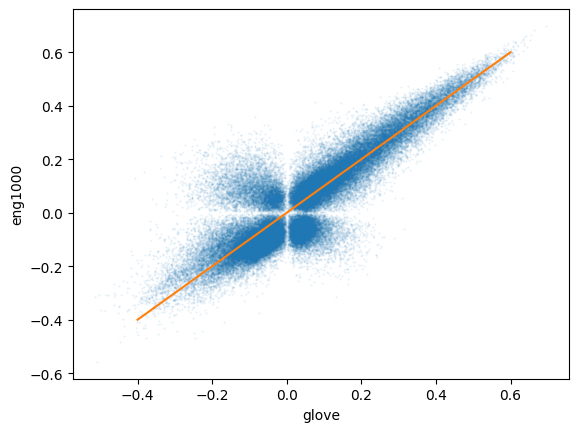

In [26]:
plt.plot(corrs_glove, corrs_eng1000, '.', alpha=0.1, ms=1)
plt.plot([-.4, .6], [-.4, .6])
plt.xlabel('glove')
plt.ylabel('eng1000')
plt.show()

# Load linear modeling results

In [3]:
save_dir = '/home/chansingh/mntv1/deep-fMRI/results/linear_models/oct10'
dfs = []
fnames = os.listdir(save_dir)[::-1]
for fname in fnames:
    df = pd.read_pickle(join(save_dir, fname))
    # print(fname)
    # display(df)
    dfs.append(df.reset_index())

In [10]:
d = pd.concat(dfs).drop(columns='coef_').round(2)
d.set_index(['feats', 'dset'], inplace=True)
# d

,,acc,feats_dim
feats,dset,,
glovevecs,tweet_eval,0.68,300
glovefmri,NaN,0.68,1912
eng1000vecs,tweet_eval,0.65,985
eng1000fmri,tweet_eval,0.65,1912
bow,tweet_eval,0.73,16920
glovevecs,trec,0.84,300
glovefmri,NaN,0.84,1912
eng1000vecs,trec,0.73,985
eng1000fmri,trec,0.71,1912


In [30]:
# pd.concat(dfs, keys=list(zip(fnames, df.index)), axis=0).round(2)

feats   acc  feats_dim
tweet_eval.pkl eng1000vecs 0  eng1000vecs  0.65        985
                           1  eng1000fmri  0.65       1912
                           2          bow  0.73      16920
trec.pkl       eng1000fmri 0  eng1000vecs  0.73        985
                           1  eng1000fmri  0.71       1912
                           2          bow  0.86       8410
sst2.pkl       bow         0  eng1000vecs  0.76        985
                           1  eng1000fmri  0.75       1912
                           2          bow  0.80      13774

In [31]:
list(zip(fnames, [df.index.tolist()] * len(fnames)))

[('tweet_eval.pkl', ['eng1000vecs', 'eng1000fmri', 'bow']),
 ('trec.pkl', ['eng1000vecs', 'eng1000fmri', 'bow']),
 ('sst2.pkl', ['eng1000vecs', 'eng1000fmri', 'bow']),
 ('rotten_tomatoes.pkl', ['eng1000vecs', 'eng1000fmri', 'bow']),
 ('emotion.pkl', ['eng1000vecs', 'eng1000fmri', 'bow'])]

# Load dataset

In [13]:
dataset = 'trec'
X, y, X_test, y_test = get_dsets(dataset)
print('shapes', len(X), len(X_test))
print('labels', np.unique(y), np.unique(y_test))

Using custom data configuration default
Reusing dataset trec (/home/chansingh/.cache/huggingface/datasets/trec/default/1.1.0/751da1ab101b8d297a3d6e9c79ee9b0173ff94c4497b75677b59b61d5467a9b9)


  0%|          | 0/2 [00:00<?, ?it/s]

Using custom data configuration default
Reusing dataset trec (/home/chansingh/.cache/huggingface/datasets/trec/default/1.1.0/751da1ab101b8d297a3d6e9c79ee9b0173ff94c4497b75677b59b61d5467a9b9)


  0%|          | 0/2 [00:00<?, ?it/s]

shapes 5452 500
labels [0 1 2 3 4 5] [0 1 2 3 4 5]


# Test models

In [2]:
eng1000 = SemanticModel.load(join(em_data_dir, 'english1000sm.hf5'))

In [3]:
eng1000.data.shape

(985, 10470)

In [9]:
len(eng1000.vocab)

10470

In [13]:
eng1000.vocab[:5]

[b'', b'raining', b'yellow', b'four', b'woods']

In [16]:
from encoding.feature_spaces import nlp_utils_dir
glove = SemanticModel.load_np(join(nlp_utils_dir, 'glove'))

In [17]:
glove.data.shape

(300, 2196019)

In [18]:
len(glove.vocab)

2196019

In [19]:
glove.vocab[:5]

[b'<pad>', b'<unk>', b',', b'.', b'the']